# Exploring the Bitcoin cryptocurrency market

#### Project Description
To better understand the growth and impact of Bitcoin and other cryptocurrencies I will, in this project, explore the market capitalization of different cryptocurrencies.


#### Project Tasks
1.	Bitcoin. Cryptocurrencies. So hot right now.
2.	Full dataset, filtering, and reproducibility
3.	Discard the cryptocurrencies without a market capitalization
4.	How big is Bitcoin compared with the rest of the cryptocurrencies?
5.	Making the plot easier to read and more informative
6.	What is going on?! Volatility in cryptocurrencies
7.	Well, we can already see that things are *a bit* crazy
8.	Ok, those are... interesting. Let's check the weekly Series too.
9.	How small is small?
10.	Most coins are tiny


##### Task 1: Bitcoin. Cryptocurrencies. So hot right now

After the massive Bitcoin price surge in November 2013, the popularity of launching new cryptocurrencies took off along with it. In fact, if you go back at historical snapshots around that time, you’ll see that there were literally hundreds of new coins available to mine and buy. Here’s one from November 2014 – a time when there were only 32 coins that were worth more than $1 million in market cap, and 354 coins that were worth less than $50,000, usually trading for tiny fractions of a cent.
As a first task, we will load the current data from the coinmarketcap API and display it in the output.


In [1]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading in current data from coinmarketcap.com
current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")

# Printing out the first few lines
current.head()

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,5.448901e+09,17279637,bitcoin,1537527321,115775244395,2.100000e+07,Bitcoin,-0.09,4.37,2.90,1.000000,6700.097021,1,BTC,17279637
1,2.261969e+09,102093634,ethereum,1537527275,23100659260,NaN,Ethereum,0.26,7.70,7.14,0.033825,226.269341,2,ETH,102093634
2,1.873930e+09,39809069106,ripple,1537527302,18705058317,1.000000e+11,XRP,0.46,38.07,68.50,0.000070,0.469869,3,XRP,99991841593
3,4.936958e+08,17360313,bitcoin-cash,1537527271,8337049983,2.100000e+07,Bitcoin Cash,-0.24,11.41,5.23,0.071791,480.236170,4,BCH,17360313
4,9.226671e+08,906245118,eos,1537527274,5227811573,NaN,EOS,-0.11,9.55,8.70,0.000862,5.768651,5,EOS,1006245120


##### Task 2: Full dataset, filtering, and reproducibility
The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. So we will analyze them now.

In [2]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_json("https://api.coinmarketcap.com/v1/ticker/?limit=0")
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6.loc[:, ["id", "market_cap_usd"]]
# Counting the number of values
market_cap_raw.count()

id                1981
market_cap_usd    1590
dtype: int64

##### Task 3:Discard the cryptocurrencies without a market capitalization
Why do the count() for id and market_cap_usd differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.

In [3]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')
# Counting the number of values again
cap.count()

id                1590
market_cap_usd    1590
dtype: int64

##### Task 4:How big is Bitcoin compared with the rest of the cryptocurrencies?
At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

Text(0,0.5,'% of total cap')

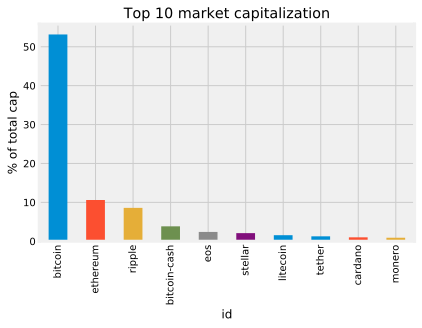

In [4]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index("id")
# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/cap.market_cap_usd.sum()) * 100)
# Plotting the barplot with the title defined above 
ax = cap10.market_cap_perc.head(10).plot.bar(title=TOP_CAP_TITLE)
# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)

##### Task 5: Making the plot easier to read and more informative
While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log10 scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative1.

/srv/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,0,'')

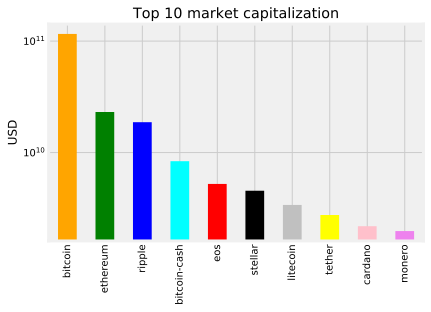

In [5]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'blue', 'cyan', 'red', 'black', 'silver', 'yellow', 'pink', 'violet']
# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = cap10.market_cap_usd.head(10).plot.bar(title=TOP_CAP_TITLE, colors=COLORS)
ax.set_yscale('log')
# Annotating the y axis with 'USD'
ax.set_ylabel('USD')
# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('')

##### Task 6: What is going on? Volatility in cryptocurrencies!
The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [6]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6.loc[:,["id", "percent_change_24h", "percent_change_7d"]]
# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()
# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by='percent_change_24h', ascending=True)
# Checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
mero,-71.80,-82.49
royalties,-63.91,-34.86
acre,-52.31,-17.30
motocoin,-50.69,-63.77
rabbitcoin,-50.55,-5.87


##### Task 7:	Well, we can already see that things are *a bit* crazy
It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

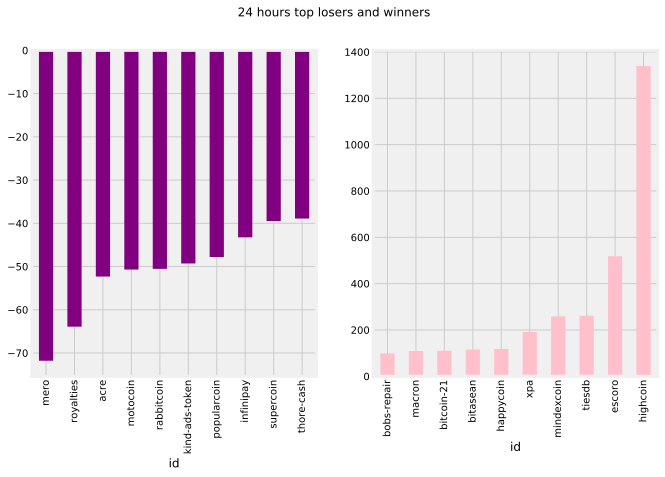

In [7]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    volatility_series[:10].plot.bar(ax=axes[0], color='purple')
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    volatility_series[-10:].plot.bar(ax=axes[1], color='pink')
    
    # Returning this for good practice, might use later
    return fig, ax
DTITLE = "24 hours top losers and winners"
# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

##### Task 8: Ok, those are... interesting. Let's check the weekly Series too
1400% daily increase?! Why are we doing this tutorial and not buying random coins?

After calming down, let's reuse the function defined above to see what is going weekly instead of daily.

1 Please take a moment to understand the implications of the purple plots on how much value some cryptocurrencies lose in such short periods of time

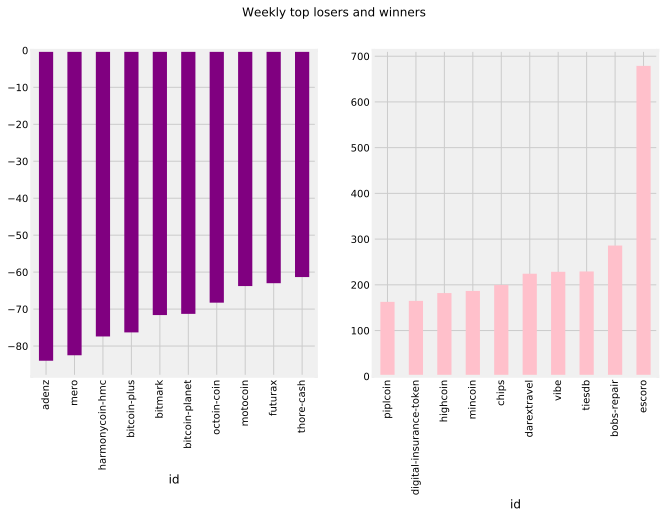

In [8]:

# Sorting in ascending order
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)
WTITLE = "Weekly top losers and winners"
# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

##### Task 9: How small is small?
The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones1. Let's classify our dataset based on Investopedia's capitalization definitions for company stocks.

In [9]:
# Selecting everything bigger than 10 billion 
largecaps = market_cap_raw.query('market_cap_usd > 1e+10')
# Printing out largecaps
print(largecaps)

         id  market_cap_usd
0   bitcoin    1.159488e+11
1  ethereum    2.311619e+10
2    ripple    1.871709e+10


##### Task 10: Most coins are tiny
Note that many coins are comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.

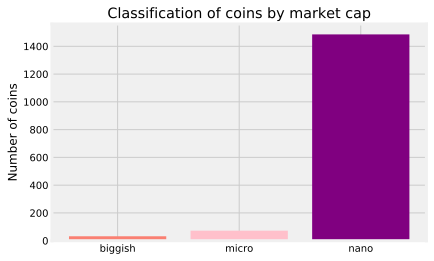

In [11]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id
# Labels for the plot
LABELS = ["biggish", "micro", "nano"]
# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 3e+8')
# Same as above for micro ...
micro = capcount('market_cap_usd > 5e+7 and market_cap_usd < 3e+8')
# ... and for nano
nano = capcount('market_cap_usd < 5e+7')
# Making a list with the 3 counts
values = [biggish, micro, nano]
# Plotting them with matplotlib 
fig, ax = plt.subplots()
nano_plt, micro_plt, biggish_plt = plt.bar([0, 1, 2], values, tick_label=LABELS)
nano_plt.set_facecolor('salmon')
micro_plt.set_facecolor('pink')
biggish_plt.set_facecolor('purple')
ax.set_ylabel('Number of coins')
ax.set_title('Classification of coins by market cap')
plt.show()

That's It....:)